## 感知机(Perceptron)

前向传播，反向传播，链式法则


前向传播：
通过输入层输入，一度向前计算出输出结果

反向传播：
通过输出反向更新权重的过程，通过比较模型的输出和源数据真实的情况计算差值，将前向计算过程反过来进行计算，
通过差值乘上学习率来更新权重

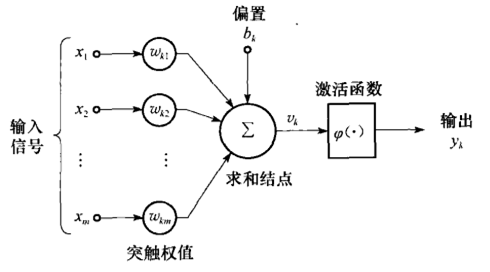

## 超平面(Hyperplane)
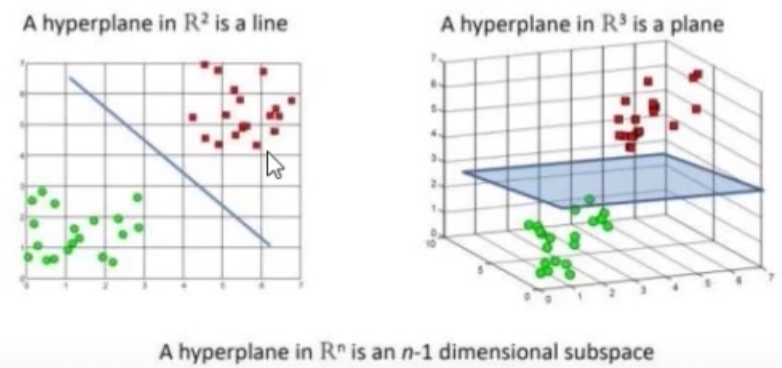

In [9]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
plt.rcParams['font.serif'] = ['SimHei']#用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False#用来正常显示负号
plt.rcParams['figure.figsize'] = (8.0, 6.0)#生成图的大小

## 随机产生数据

### np.random.rand()

作用：通过本函数可以返回一个或一组服从标准正态分布的随机样本值。随机样本取值范围是[0,1)，不包括1.

语法：

np.random.randn(d0,d1,d2……dn) 

1)当函数括号内没有参数时，则返回一个浮点数； 

2）当函数括号内有一个参数时，则返回秩为1的数组，不能表示向量和矩阵； 

3）当函数括号内有两个及以上参数时，则返回对应维度的数组，能表示向量或矩阵； 

4）np.random.standard_normal（）函数与np.random.randn()类似，但是np.random.standard_normal（） 的输入参数为元组（tuple）. 

5)np.random.randn()的输入通常为整数，但是如果为浮点数，则会自动直接截断转换为整数
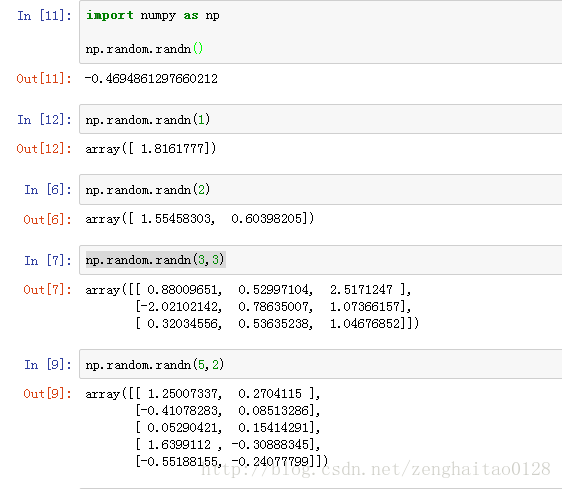


Text(0.5, 1.0, 'random display')

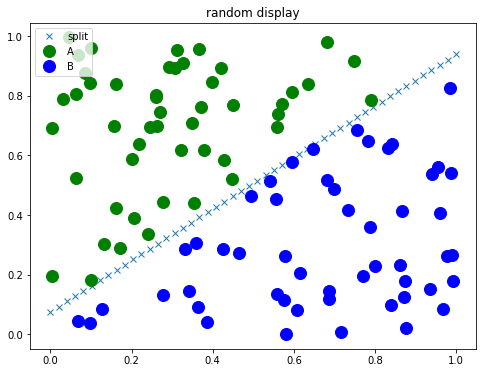

In [20]:
#产生新画布
fig = plt.figure()
#获取当前画布
figa = plt.gca()

#产生100个点
N = 100

xn = np.random.rand(N, 2)
#返回一系列均匀分布的值，在0，1之间平均的产生50个点
x = np.linspace(0, 1)

#随机产生一条线
a = np.random.rand()
b = np.random.rand()
f = lambda x : a*x + b
plt.plot(x,f(x),'x')

#线性分割卡前面产生的点
yn = np.zeros([N,1])

for i in range(N):
    if(f(xn[i, 0]) >= xn[i, 1]):
        # Point is below line
        yn[i] = 1
        plt.plot(xn[i, 0], xn[i, 1], 'bo', markersize = 12)
    else:
        #Point is above line
        yn[i] = -1
        plt.plot(xn[i, 0], xn[i, 1], 'go', markersize = 12)
plt.legend(['split','A','B'],loc = 2)
plt.title('random display')

### matplotlib.pyplot.plot()
单条线：

plot([x], y, [fmt], data=None, **kwargs)

多条线一起画

plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)



**[fmt]**

可选参数 **[fmt]** 是一个字符串来定义图的基本属性如：颜色（color），点型（marker），线型（linestyle），

具体形式  fmt = '[color][marker][line]'

fmt接收的是每个属性的单个字母缩写，例如：

plot(x, y, 'bo-')  #蓝色圆点实线

若属性用的是全名则不能用 **fmt** 参数来组合赋值，应该用关键字参数对单个属性赋值如：

plot(x,y2,color='green', marker='o', linestyle='dashed', linewidth=1, markersize=6)

plot(x,y3,color='#900302',marker='+',linestyle='-')



**Colors**
    
       character         color
    
    ===============   ===============
    
        ``'b'``          blue 蓝
        
        ``'g'``          green 绿
    
        ``'r'``          red 红
    
        ``'c'``          cyan 蓝绿
    
        ``'m'``          magenta 洋红
    
        ``'y'``          yellow 黄
    
        ``'k'``          black 黑
        
        ``'w'``          white 白


**Markers**

        character              description
    ================    ===============================
        ``'.'``                point marker
                
        ``','``                pixel marker
        
        ``'o'``                circle marker
        
        ``'v'``                triangle_down marker
        
        ``'^'``                triangle_up marker
        
        ``'<'``                triangle_left marker
        
        ``'>'``                triangle_right marker
        
        ``'1'``                tri_down marker
        
        ``'2'``                tri_up marker
        
        ``'3'``                tri_left marker
        
        ``'4'``                tri_right marker
        
        ``'s'``                square marker
              
        ``'p'``                pentagon marker
        
        ``'*'``                star marker
        
        ``'h'``                hexagon1 marker
        
        ``'H'``                hexagon2 marker
              
        ``'+'``                plus marker
        
        ``'x'``                x marker
        
        ``'D'``                diamond marker
        
        ``'d'``                thin_diamond marker
        
        ``'|'``                vline marker
        
        ``'_'``                hline marker



**Line Styles**

        character                description
    =================    ===============================
        ``'-'``              solid line style 实线
       
       ``'--'``             dashed line style 虚线
       
       ``'-.'``             dash-dot line style 点画线
       
       ``':'``              dotted line style 点线


## 超平面DE SHIXIAN 的实现

In [34]:
def perceptron(xn,yn,MaxIter=1000,a=0.1,w=np.zeros(3)):
    '''
    实现一个二维感知机
    对于给定的（x,y）,感知机将通过迭代寻找最佳的超平面来进行分类

    输入：
        xn:数据点 N*2 向量

        yn:分类结果 N*2 向量

        MaxIter:最大迭代次数(可选参数)

        a:学习率
        w:初始值（可选参数）
    输出：
        w:超平面参数使得y= ax+b 最好的分割平面
    注意：
        由于初始值为随机选取，因此迭代到收敛可能需要一些时间，
        该函数仅为感知机的简单实现，实际实现需要考虑更多内容
    '''
    
    N = xn.shap[0]
    #生成超平面
    f = lambda s: np.sign(w[0]*1 + w[1]*x[0] + w[2]*x[1])
    
    for _ in range(MaxIter):
        i = np.random.randint(N)
        #如果分类没有完全最准确，则进行调整，反向传播
        if(yn[i] != f(xn[i, :])):
            w[0] = w[0] + yn[i]* 1 *a
            w[1] = w[1] + yn[i]*xn[i,0]*a
            w[2] = w[2] + yn[i]*xn[i,1]*a
    return w

### 实际应用

In [35]:
w = perceptron(xn,yn)

#利用权重值w 计算 y = ax + b中的a和b
bnew = -w[0]/w[2]
anew = -w[1]/w[2]
y = lambda x : anew * x + bnew

#分割颜色
sep_color = (yn)/2.0

plt.figure()
figa = plt/gca()

plt.scatter(xn[:,0],xn[:,1],c=sep_color.flatten(),s=50)
plt.plot(x,y(x),'b-',label='result')
plt.plot(x,f(x),'r',label='original')
plt.legend()

plt.title('compare')




AttributeError: 'numpy.ndarray' object has no attribute 'shap'